c:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


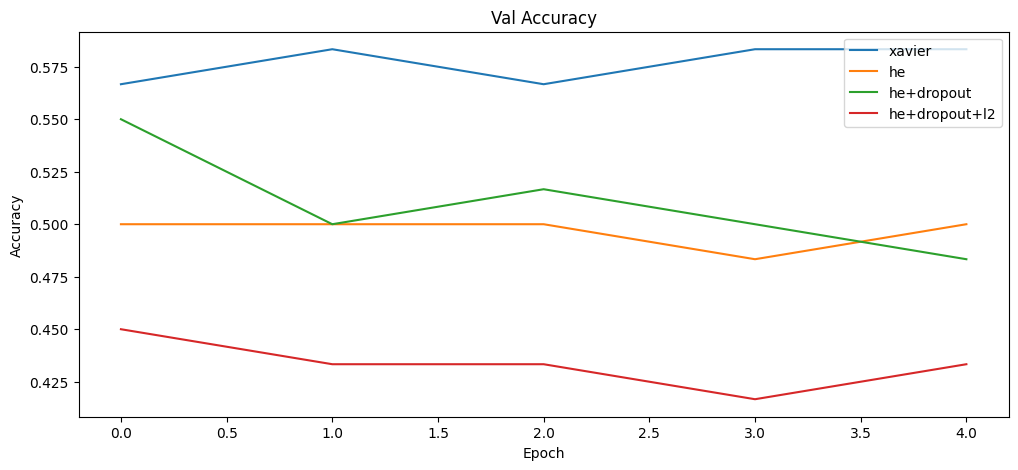

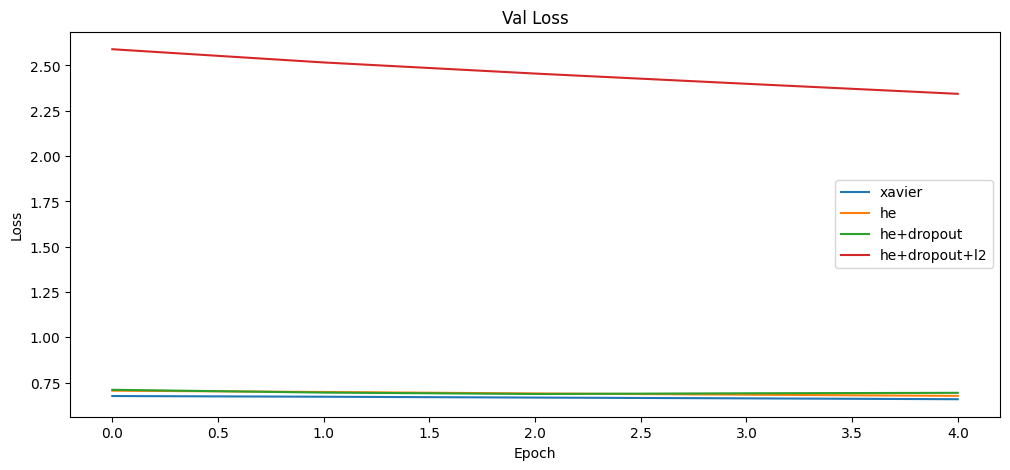

In [2]:
import numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import Sequential, layers, regularizers
from sklearn.model_selection import train_test_split

np.random.seed(42); tf.random.set_seed(42)

# 1. Toy dataset
X = np.random.rand(200,10).astype("float32")
y = (np.sum(X,axis=1)>5).astype("int32")
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

# 2. Model builder
def make_model(init='glorot_uniform', dropout=False, l2=0.0):
    reg = regularizers.l2(l2) if l2 > 0 else None
    m = Sequential()
    
    m.add(layers.Dense(64, activation='relu', kernel_initializer=init, kernel_regularizer=reg, input_shape=(X_train.shape[1],)))
    if dropout:
        m.add(layers.Dropout(0.5))
    
    m.add(layers.Dense(32, activation='relu', kernel_initializer=init, kernel_regularizer=reg))
    if dropout:
        m.add(layers.Dropout(0.5))
    
    m.add(layers.Dense(1, activation='sigmoid'))
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return m


# 3. Configs
configs = {
    "xavier": ["glorot_uniform", False, 0.0],
    "he": ["he_uniform", False, 0.0],
    "he+dropout": ["he_uniform", True, 0.0],
    "he+dropout+l2": ["he_uniform", True, 0.01]
}

# 4. Train and store history
histories = {}
for name,(init,drop,l2) in configs.items():
    h = make_model(init,drop,l2).fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5,batch_size=16,verbose=0)
    histories[name] = h.history

# 5. Plot results
plt.figure(figsize=(12,5))
for name,h in histories.items(): 
    plt.plot(h["val_accuracy"],label=name)

plt.title("Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
for name,h in histories.items(): 
    plt.plot(h["val_loss"],label=name)

plt.title("Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
